In [59]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

# The data

In [60]:
# read saved train data: imputed X by univariate
df = pd.read_csv('/accounts/grad/hngxinrui/univariate_imputed__full_data.csv')

In [162]:
#only 7 predictors left after dropping highly correlated features
columns = ["bedroomcnt", "calculatedfinishedsquarefeet", "lotsizesquarefeet",'propertylandusetypeid',
          "yearbuilt", "dist_to_dtla", "dist_to_ocean", 'structuretaxvaluedollarcnt', "price"]
lm = pd.DataFrame(df, columns=columns)

In [163]:
## seperate the single house, emptyland and appartment for EDA plots
condominium = lm[(lm['propertylandusetypeid'] == 266)]

# multi-unit-home includes duplex, triplex, quadruplex
multi_unit_home = lm[(lm['propertylandusetypeid'] == 246) |
                    (lm['propertylandusetypeid'] == 247) |
                    (lm['propertylandusetypeid'] == 248)]
                       
single_family = lm[lm['propertylandusetypeid'] == 261]

# Planned Unit Development (townhouse)
townhouse = lm[lm['propertylandusetypeid'] == 269]

mobile_home = lm[lm['propertylandusetypeid'] == 263]

In [164]:
print(len(condominium)/2961361)
print(len(multi_unit_home)/2961361)
print(len(single_family)/2961361)
print(len(townhouse)/2961361)
print(len(mobile_home)/2961361)
print(len(lm))

0.1629686485369396
0.06537568368057795
0.7252287039641571
0.020184975759456547
0.01638435840817786
2961361


In [165]:
# do a 80,20 split on each data, set a seed
import random
random.seed(222)
from sklearn.model_selection import train_test_split

train, test = train_test_split(lm, test_size=0.2)
train_con, test_con = train_test_split(condominium, test_size=0.2)
train_mul, test_mul = train_test_split(multi_unit_home, test_size=0.2)
train_sin, test_sin = train_test_split(single_family, test_size=0.2)
train_town, test_town = train_test_split(townhouse, test_size=0.2)
train_mob, test_mob = train_test_split(mobile_home, test_size=0.2)

In [166]:
#split train test
#full data
X_train = train.drop(['price','lotsizesquarefeet',"propertylandusetypeid"], axis =1)
Y_train = train['price']
X_test = test.drop(['price','lotsizesquarefeet',"propertylandusetypeid"], axis =1)
Y_test = test['price']

#condo
X_train_con = train_con.drop(['price',"propertylandusetypeid"], axis =1)
Y_train_con = train_con['price']
X_test_con = test_con.drop(['price',"propertylandusetypeid"], axis =1)
Y_test_con = test_con['price']

#multi_unit
X_train_mul = train_mul.drop(['price',"propertylandusetypeid"], axis =1)
Y_train_mul = train_mul['price']
X_test_mul = test_mul.drop(['price',"propertylandusetypeid"], axis =1)
Y_test_mul = test_mul['price']

#single_family
X_train_sin = train_sin.drop(['price','lotsizesquarefeet',"propertylandusetypeid"], axis =1)
Y_train_sin = train_sin['price']
X_test_sin = test_sin.drop(['price','lotsizesquarefeet',"propertylandusetypeid"], axis =1)
Y_test_sin = test_sin['price']

#townhouse
X_train_town = train_town.drop(['price', "propertylandusetypeid"], axis =1)
Y_train_town = train_town['price']
X_test_town = test_town.drop(['price', "propertylandusetypeid"], axis =1)
Y_test_town = test_town['price']

#mobile_home
X_train_mob = train_mob.drop(['price', "propertylandusetypeid"], axis =1)
Y_train_mob = train_mob['price']
X_test_mob = test_mob.drop(['price', "propertylandusetypeid"], axis =1)
Y_test_mob = test_mob['price']


In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def get_eval_metrics(models, X, y_true): 
    """
    Calculates MAE (Mean Absoulate Error) and RMSE (Root Mean Squared Error) on the data set for input models. 
    `models`: list of fit models 
    """
    for model in models: 
        y_pred= model.predict(X)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        print(f"Model: {model}")
        print(f"MAE: {mae}, RMSE: {rmse}")

# Test usage of RMSE function
# get_eval_metrics([lin_reg, ridge_reg, lasso_reg], X_prepared_val, y_val)

#calculate average log error 
import math
from statistics import mean
def get_avg_log_error(model, X, y_true):
    """
    Calculate average log error on the data set for imput models
    log error = abs(log(true price) - log(prediction))
    """
    y_pred= model.predict(X)
    avg_log_error = np.mean(abs(np.log(y_true) - np.log(y_pred)))
    print(f"log_error: {avg_log_error}")

# The model

In [168]:
#linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

Full data

In [169]:
#view model summary (not available for regularized fit)
est = sm.OLS(Y_train, sm.add_constant(X_train))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 1.039e+06
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        17:02:41   Log-Likelihood:            -3.4092e+07
No. Observations:             2369088   AIC:                         6.818e+07
Df Residuals:                 2369081   BIC:                         6.818e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [133]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

model.coef_

array([ 8.90218182e+04,  4.11323861e+00,  1.29460279e+03, -4.09838013e+02,
       -1.81486107e+03,  1.46367008e+00])

In [134]:
# testing MAE and RMSE
get_eval_metrics([model], X_test, Y_test)

#average log error
get_avg_log_error(model, X_test, Y_test)

Model: LinearRegression()
MAE: 172995.0143817227, RMSE: 429858.6933501276
log_error: 0.43852966712584573


Condo

In [111]:
#view model summary (not available for regularized fit)
est = sm.OLS(Y_train_con, sm.add_constant(X_train_con))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 8.855e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        14:11:37   Log-Likelihood:            -5.2690e+06
No. Observations:              386087   AIC:                         1.054e+07
Df Residuals:                  386079   BIC:                         1.054e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [112]:
#fit linear regression model
model_con = LinearRegression()
model_con.fit(X_train_con, Y_train_con)

# testing MAE and RMSE
get_eval_metrics([model_con], X_test_con, Y_test_con)

#average log error
get_avg_log_error(model_con, X_test_con, Y_test_con)

Model: LinearRegression()
MAE: 115261.97888117668, RMSE: 187361.54641759736
log_error: 0.31965512285264613


Multi-unit

In [83]:
#view model summary (not available for regularized fit)
est = sm.OLS(Y_train_mul, sm.add_constant(X_train_mul))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 2.217e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        14:09:03   Log-Likelihood:            -2.1481e+06
No. Observations:              154880   AIC:                         4.296e+06
Df Residuals:                  154872   BIC:                         4.296e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [84]:
#fit linear regression model
model_mul = LinearRegression()
model_mul.fit(X_train_mul, Y_train_mul)

# testing MAE and RMSE
get_eval_metrics([model_mul], X_test_mul, Y_test_mul)

#average log error
get_avg_log_error(model_mul, X_test_mul, Y_test_mul)

Model: LinearRegression()
MAE: 145055.12497103383, RMSE: 252056.84102465774
log_error: 0.36648781677512854


Single-family

In [85]:
#view model summary (not available for regularized fit)
est = sm.OLS(Y_train_sin, sm.add_constant(X_train_sin))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 6.027e+05
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:            -2.4566e+07
No. Observations:             1718131   AIC:                         4.913e+07
Df Residuals:                 1718124   BIC:                         4.913e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [86]:
#fit linear regression model
model_sin = LinearRegression()
model_sin.fit(X_train_sin, Y_train_sin)

# testing MAE and RMSE
get_eval_metrics([model_sin], X_test_sin, Y_test_sin)

#average log error
get_avg_log_error(model_sin, X_test_sin, Y_test_sin)

Model: LinearRegression()
MAE: 168808.31084511353, RMSE: 374942.35884777555
log_error: 0.3994903846816135


Townhouse

In [87]:
#view model summary (not available for regularized fit)
est = sm.OLS(Y_train_town, sm.add_constant(X_train_town))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 2.151e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        14:09:06   Log-Likelihood:            -6.4727e+05
No. Observations:               47820   AIC:                         1.295e+06
Df Residuals:                   47812   BIC:                         1.295e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [160]:
#fit linear regression model
model_town = LinearRegression()
model_town.fit(X_train_town, Y_train_town)

# testing MAE and RMSE
get_eval_metrics([model_town], X_test_town, Y_test_town)

#average log error
get_avg_log_error(model_town, X_test_town, Y_test_town)

Model: LinearRegression()
MAE: 124437.04762469002, RMSE: 176524.78782139978
log_error: 0.2524982165068726


Mobile_home

In [161]:
#fit linear regression model
model_mob = LinearRegression()
model_mob.fit(X_train_mob, Y_train_mob)

# testing MAE and RMSE
get_eval_metrics([model_mob], X_test_mob, Y_test_mob)

#average log error
get_avg_log_error(model_mob, X_test_mob, Y_test_mob)

Model: LinearRegression()
MAE: 21713.187182159974, RMSE: 55187.52399306285
log_error: 0.6629433152590443


# Analysis

In [140]:
pred = model.predict(X_test)
result = pd.DataFrame({'True': Y_test, 'Prediction': pred}, 
                      columns=['True', 'Prediction'])

In [141]:
result.head(5)

,True,Prediction
33452,1.414674e+06,757365.709678
1830685,9.544294e+04,175525.547899
1201462,3.407601e+05,403658.072120
1636732,2.994224e+05,400597.550975
987650,1.282653e+05,311301.462642


In [142]:
result['Label'] = np.where(result['Prediction'] < 0.9 * result['True'], 'under',
                          np.where(result['Prediction'] > 1.1 * result['True'], 'over', 'correct'))

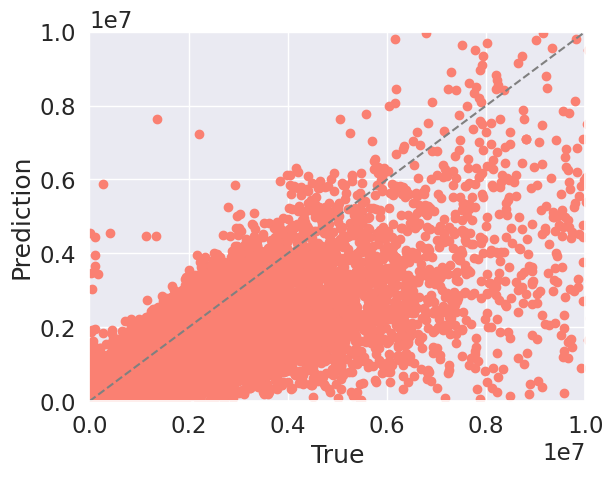

In [143]:
# import required module
import matplotlib.pyplot as plt

# depict first scatted plot
plt.scatter(result['True'], result['Prediction'], c = "Salmon")
plt.xlim(0, 10000000)
plt.ylim(0, 10000000)

# add diagonal line
plt.plot([0, 10000000], [0, 10000000], linestyle='--', color='gray')

# add variable names
plt.xlabel('True')
plt.ylabel('Prediction')

# depict illustration
plt.show()

In [144]:
over = result[result["Prediction"] >  1.1 * result["True"]]
under = result[result["Prediction"] < 0.9 * result["True"]]
correct = result[~result.index.isin(over.index) & ~result.index.isin(under.index)]

In [145]:
correct_indices = correct.index.tolist()
correct_test = test[test.index.isin(correct_indices)]
#under = result[result["Prediction"] < 0.9 * result["True"]]
#under_indices = under.index.tolist()
#under_test = test[test.index.isin(under_indices)]

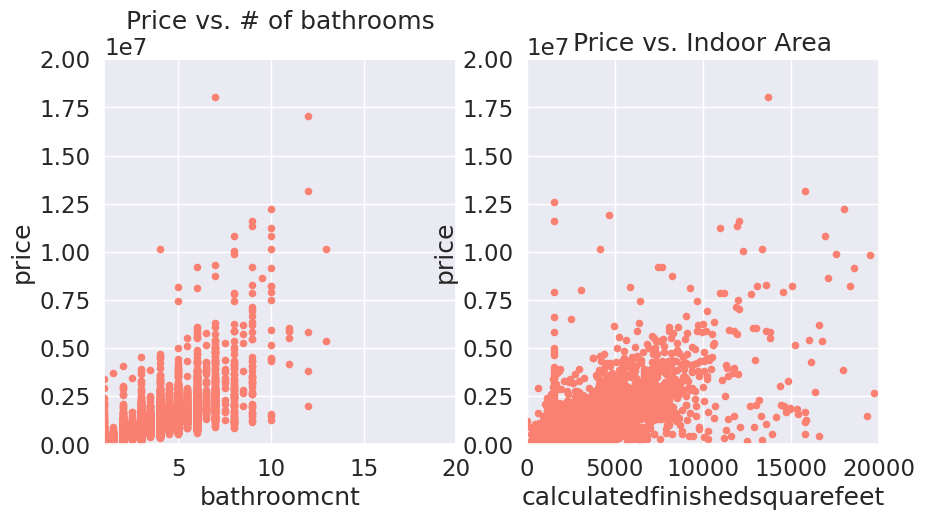

In [156]:
# visualize the relationship between the features and the response using scatterplots
#arrange layout
fig, axes = plt.subplots(nrows=1, ncols=2,squeeze=False,figsize=(10, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# scatter plot between # of bathrooms and price
correct_test.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 0])
axes[0, 0].set_xlim(1,20)
axes[0, 0].set_ylim(0,20000000)
axes[0, 0].set_title('Price vs. # of bathrooms')

# scatter plot between calculatedfinishedsquarefeet and price
correct_test.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 1])
#plot area less than 200000squarefeet,remove outliers
axes[0, 1].set_xlim(0,20000)
axes[0, 1].set_ylim(0,20000000)
axes[0, 1].set_title('Price vs. Indoor Area')

plt.show()

In [154]:
test['Label'] = np.where(result['Prediction'] < 0.85 * result['True'], 'under',
                          np.where(result['Prediction'] > 1.1 * result['True'], 'over', 'correct'))

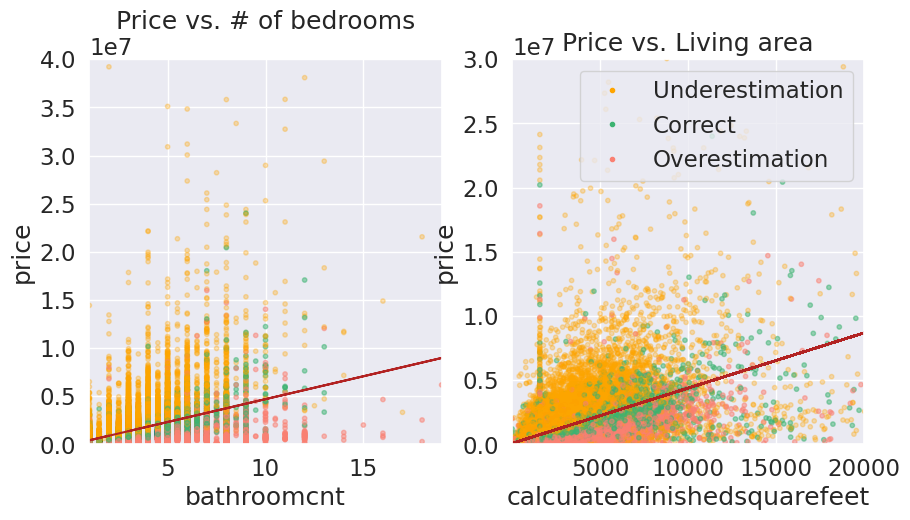

In [155]:
# visualize the relationship between the features and the response using scatterplots
#arrange layout

# create a dictionary mapping property types to colors
color_map = {'under': 'orange', 'correct': 'mediumseagreen', 'over': 'salmon'}

# Define the transparency for each group
alpha_values = {'under': 0.3, 'correct': 0.5, 'over': 0.5}


# Map the colors based on the categories
colors = test['Label'].map(color_map)
alpha = test['Label'].map(alpha_values)

fig, axes = plt.subplots(nrows=1, ncols=2,squeeze=False,figsize=(10, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# scatter plot between # of bathrooms and price
test.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = colors,
        s = 10,
        alpha = alpha,
        ax=axes[0, 0])
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(test["bathroomcnt"], test["price"], 1)

#use red as color for regression line
axes[0, 0].plot(test["bathroomcnt"], 2*m*test["bathroomcnt"]+b, color='firebrick')

#remove cases when room count <20
axes[0, 0].set_xlim(1,19)
axes[0, 0].set_ylim(0,40000000)
axes[0, 0].set_title('Price vs. # of bedrooms')

# scatter plot between calculatedfinishedsquarefeet and price
test.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = colors,
        s = 10,
        alpha = alpha,
        ax=axes[0, 1])
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(test["calculatedfinishedsquarefeet"], test["price"], 1)

#use red as color for regression line
axes[0, 1].plot(test["calculatedfinishedsquarefeet"], 2*m*test["calculatedfinishedsquarefeet"]+b, color='firebrick')
#plot area less than 200000squarefeet,remove outliers
axes[0, 1].set_xlim(1,20000)
axes[0, 1].set_ylim(0,30000000)
axes[0, 1].set_title('Price vs. Living area')

# Create legend handles and labels
handles = [plt.Line2D([], [], marker='.', color='orange', linestyle='None'),
           plt.Line2D([], [], marker='.', color='mediumseagreen', linestyle='None'),
           plt.Line2D([], [], marker='.', color='salmon', linestyle='None')]

labels = ['Underestimation', 'Correct', 'Overestimation']

# Add legend
plt.legend(handles, labels, loc='best')

plt.show()

In [157]:
over = result[result['Prediction'] > 2 * result['True']]
#under
#outlier = result[result['Prediction'] > 4000000]
#outlier = outlier[outlier['True'] < 2000000]
outliers = test[test.index.isin(over.index)]
outliers

,bathroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,propertylandusetypeid,yearbuilt,dist_to_dtla,dist_to_ocean,structuretaxvaluedollarcnt,price,Label
987650,2.0,825.0,45619.0,266.0,34,11.531110,13.863822,89847.0,128265.328446,over
351573,1.0,914.0,5877.0,261.0,82,10.367313,48.198392,17787.0,43405.555784,over
1108157,2.0,2156.0,15153.0,261.0,72,11.397262,19.166831,66668.0,143979.976983,over
1688804,1.0,800.0,7374.0,261.0,75,9.224034,13.510428,16292.0,81245.437027,over
91225,2.0,1962.0,6712.0,261.0,94,9.556983,49.455205,84720.0,136120.138102,over
...,...,...,...,...,...,...,...,...,...,...
30954,3.0,1220.0,6057.0,261.0,79,11.213800,51.822158,45797.0,75908.592178,over
534350,2.0,1603.0,7345.0,261.0,75,6.894026,7.960383,36838.0,88199.177387,over
768655,2.0,1774.0,16120.0,261.0,83,21.986003,5.463526,23005.0,105875.223277,over
1723178,0.0,960.0,7000.0,263.0,47,15.181757,8.588350,127253.0,14532.780901,over


In [159]:
#test.loc[[442500, 368489, 384651, 2455736, 2206597]]

In [ ]:
# visualize the relationship between the features and the response using scatterplots
#arrange layout
fig, axes = plt.subplots(nrows=2, ncols=3,squeeze=False,figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# scatter plot between # of bathrooms and price
outliers.plot(kind = 'scatter',
        x = 'bathroomcnt',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 0])
#remove cases when room count <20
#axes[0, 0].set_xlim(0,20)
#axes[0, 0].set_ylim(0,100000000)
axes[0, 0].set_title('Price vs. # of bathrooms')

# scatter plot between lot size and price
outliers.plot(kind = 'scatter',
        x = 'lotsizesquarefeet',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 1])
#remove cases lot size > 200000
#axes[0, 1].set_xlim(0,2000000)
#axes[0, 1].set_ylim(0,150000000)
axes[0, 1].set_title('Price vs. lot size ')

# scatter plot between calculatedfinishedsquarefeet and price
outliers.plot(kind = 'scatter',
        x = 'calculatedfinishedsquarefeet',
        y = 'price',
        color = 'salmon',
        ax=axes[0, 2])
#plot area less than 200000squarefeet,remove outliers
#axes[0, 2].set_xlim(0,20000)
#axes[0, 2].set_ylim(0,30000000)
axes[0, 2].set_title('Price vs. Calculatedfinishedsquarefeet')

# scatter plot between yearbuilt and price
outliers.plot(kind = 'scatter',
        x = 'yearbuilt',
        y = 'price',
        color = 'salmon',
        ax=axes[1, 0])
#axes[1, 0].set_ylim(0,40000000)
axes[1, 0].set_title('Price vs. yearbuilt')

# scatter plot between distance to downtown LA and price
outliers.plot(kind = 'scatter',
        x = 'dist_to_dtla',
        y = 'price',
        color = 'salmon',
        ax=axes[1, 1])
#axes[1, 2].set_xlim(1,30)
#axes[1, 1].set_ylim(0,60000000)
axes[1, 1].set_title('Price vs. Dist to dt LA')

# scatter plot between distance to sea and price
outliers.plot(kind = 'scatter',
        x = 'dist_to_ocean',
        y = 'price',
        color = 'salmon',
        ax=axes[1, 2])
#axes[1, 2].set_xlim(1,30)
#axes[1, 2].set_ylim(0,150000000)
axes[1, 2].set_title('Price vs. Dist to sea')

plt.show()

In [ ]:
result['Type'] = test['propertylandusetypeid']
result.loc[result['Type'] == 266, 'Type'] = 'Condo'
result.loc[result['Type'] == 246, 'Type'] = 'Multi-unit'
result.loc[result['Type'] == 247, 'Type'] = 'Multi-unit'
result.loc[result['Type'] == 248, 'Type'] = 'Multi-unit'
result.loc[result['Type'] == 261, 'Type'] = 'Single-family'
result.loc[result['Type'] == 269, 'Type'] = 'Townhouse'
result.loc[result['Type'] == 263, 'Type'] = 'Mobile'
result = result[result['Type'].apply(lambda x: isinstance(x, str))].astype({'Type': str})